In [3]:
import pandas as pd
import scipy
import numpy as np
from numpy import pi
from matplotlib.pyplot import *
from timeit import default_timer as timer

$$
SOLVING\>ASSIGNMENT\>PROBLEMS\>USING\>Scipy.optimize.linear\_sum\_assignment()
$$

$$
\
$$

$$
INTRODUCTION
$$

Assignment Problem is a special type of linear programming problem where the objective is to minimise the cost or time of completing a number of jobs by a number of persons.

The linear sum assignment problem (LSAP) is one of the most famous problems in linear
programming and in combinatorial optimization. Informally speaking, we are given an
$n × n$ cost matrix $C = (c_{ij})$ and we want to match each row to a different column in such
a way that the sum of the corresponding entries is minimized. In other words, we want to
select $n$ elements of $C$ so that there is exactly one element in each row and one in each
column and the sum of the corresponding costs is a minimum.

The linear sum assignment problem is also known as minimum weight matching in bipartite graphs. A problem instance is described by a matrix C, where each $C[i,j]$ is the cost of matching vertex i of the first partite set (a “worker”) and vertex j of the second set (a “job”). The goal is to find a complete assignment of workers to jobs of minimal cost.

Formally, let X be a boolean matrix where $X[i,j]=1$ iff row i is assigned to column j. Then the optimal assignment has cost

$$
min\sum_j\sum_i C_{ij}X_{ij}
$$

s.t. each row is assignment to at most one column, and each column to at most one row.

This function can also solve a generalization of the classic assignment problem where the cost matrix is rectangular. If it has more rows than columns, then not every row needs to be assigned to a column, and vice versa.

The method used is the Hungarian algorithm, also known as the Munkres or Kuhn-Munkres algorithm.

$$
\
$$

$$
CASE\>STUDY
$$


A company, AYO FARMS has 4 machines available for producing bottled water, bottled tea, Juice and milk. Any machine can be assigned
to any task, and each task requires processing by one machine.

Over the years, the company hasn't been making significant profit due to a high cost of production. Now the company wants to minimize the total cost of producing all its four products in other to maximize profit. 

The monthly cost of producing each product by each machine is stated below.

NOTE: Machine 3 doesn't have enough features to produce bottled water.

In [4]:
classes = ['Machine 1', 'Machine 2', 'Machine 3','Machine 4']
df = pd.DataFrame({'Bottled Water ($m)':[4,8,0,3],'Bottled Tea ($m)':[3,6,3,3] ,'Juice ($m)':[1,2,5,9],'Milk ($m)':[6,7,2,6]},classes)
df

,Bottled Water ($m),Bottled Tea ($m),Juice ($m),Milk ($m)
Machine 1,4,3,1,6
Machine 2,8,6,2,7
Machine 3,0,3,5,2
Machine 4,3,3,9,6


There are a number of ways to solve this, but one of the  most effective ways is using Hungarian method. 

Briefly, I will be taking us through on how to solve this linear sum assignment using hungarian method and the python inbuilt module, scipy.optimize.linear_sum_assignment().  

$$
\
$$

$$
HUNGARIAN\> METHOD
$$

Step 1: Find the minimum value of each row and subtract it from other values in the row.

Step 2: Find the minimum value of each column and subtract it from other values in the column.

Step 3: Find the minimum number $k$, of vertical and horizontal lines needed to cover all the zeros in the matrix.

Step 4: If $k \geq m$, where $m$ is the dimension of the matrix $m x n$, then we’ve reached the allocation point or optimum point. Else,  we proceed to step 5.

Step 5: Find the minimum uncovered value, subtract it from other uncovered values and add it to the corner point(intersections of zeros)
Repeat step 3 until the optimum point is reached. Then, start the assignments from the row that has a minimum number of zeros.

Step 6: Calculate the objective function $𝑍^∗$ with all the allocated decision variables.
  	 	$𝑍^∗ = ∑𝑥_{𝑖𝑗}$ ,     where $𝑥_{𝑖𝑗}=1$ , i is the row number and j is the column number.


### Using Hungarian Method to calculate the optimum value

In [45]:
import scipy

In [46]:
cost_matrix = np.array([[4,3,1,6],[8,6,2,7],[0,3,5,2],[3,3,9,6]])
cost_matrix

array([[4, 3, 1, 6],
       [8, 6, 2, 7],
       [0, 3, 5, 2],
       [3, 3, 9, 6]])

\begin{equation}
cost\_matrix = 
\begin{bmatrix}
4 & 3 & 1 & 6\\
8 & 6 & 2 & 7\\
0 & 3 & 5 & 2\\
3 & 3 & 9 & 6\\
\end{bmatrix}
\end{equation}


### Step 1. Find the minimum value in each row and subtract from other values in the row.


In [47]:
min_r = np.asarray([(min(cost_matrix[i])) for i in range(len(cost_matrix))])
min_R = min_r.reshape(4,1)
min_R

array([[1],
       [2],
       [0],
       [3]])

\begin{equation}
min_R = 
\begin{bmatrix}
1\\
2\\
0\\
3\\
\end{bmatrix}
\end{equation}


In [48]:
cost_mat = cost_matrix-min_R
cost_mat

array([[3, 2, 0, 5],
       [6, 4, 0, 5],
       [0, 3, 5, 2],
       [0, 0, 6, 3]])

\begin{equation}
cost\_mat = 
\begin{pmatrix}
4 & 3 & 1 & 6\\
8 & 6 & 2 & 7\\
0 & 3 & 5 & 2\\
3 & 3 & 9 & 6\\
\end{pmatrix}
-\begin{pmatrix}
1\\
2\\
0\\
3\\
\end{pmatrix} 
\end{equation}

\begin{equation}
cost\_mat = 
\begin{bmatrix}
3 & 2 & 0 & 5\\
6 & 4 & 0 & 5\\
0 & 3 & 5 & 2\\
0 & 0 & 6 & 3\\
\end{bmatrix}
\end{equation}


### Step 2. Find the minimum value of each column and subtract it from other values in the column.


In [49]:
A_c = cost_mat.T
min_c = np.asarray([(min(A_c[j])) for j in range(4)])
min_c

array([0, 0, 0, 2])

\begin{equation}
min_C = 
\begin{bmatrix}
0 & 0 & 0 & 2
\end{bmatrix}
\end{equation}

In [22]:
cost_mat = cost_mat - min_c
cost_mat

array([[3, 2, 0, 3],
       [6, 4, 0, 3],
       [0, 3, 5, 0],
       [0, 0, 6, 1]])

\begin{equation}
cost\_mat = 
\begin{bmatrix}
3 & 2 & 0 & 3\\
6 & 4 & 0 & 3\\
0 & 3 & 5 & 0\\
0 & 0 & 6 & 1\\
\end{bmatrix}
\end{equation}


### Step 3. Find the minimum number k, of vertical and horizontal lines needed to cover all the zeros in the matrix.


From the Matrix above, we can denote that the minimum number k, of vertical and horizontal lines needed to cover all the zeros in the matrix is 3.

### Step 4: If $k \geq m$, where $m$ is the dimension of the matrix $m x n$, then we’ve reached the allocation point or optimum point. Else,  we proceed to step 5.


### Step 5 Find the minimum uncovered value, subtract it from other uncovered values and add it to the corner point(intersections of zeros)


Minimum uncovered value ($muval) = 2$

In [23]:
for m in range(4):
    for n in range(4):
        if (m==0 or m==1) and (n==0 or n==1):
            cost_mat[m][n] = cost_mat[m][n] - 2
for q in range(4):
    for r in range(4):
        if (q==0 or q==1) and (r == 3):
            cost_mat[q][r] = cost_mat[q][r] - 2

In [24]:
for o in range(4):
    for p in range(4):
        if (o==2 and p==1):
            cost_mat[o][p] = cost_mat[o][p] + 2
        elif (o==2 and p==2):
            cost_mat[o][p] = cost_mat[o][p] + 2
        elif (o==3 and p==2):
            cost_mat[o][p] = cost_mat[o][p] + 2
        

In [25]:
cost_mat

array([[1, 0, 0, 1],
       [4, 2, 0, 1],
       [0, 5, 7, 0],
       [0, 0, 8, 1]])

\begin{equation}
cost\_mat = 
\begin{bmatrix}
1 & 0 & 0 & 1\\
4 & 2 & 0 & 1\\
0 & 5 & 7 & 0\\
0 & 0 & 8 & 1\\
\end{bmatrix}
\end{equation}


Now $k = 4$ and $m=4$. Since $k = m$, where $m$ is the dimension of the matrix $m x n$, then we’ve reached the allocation point or optimum point. Else,  we proceed to step 5.

In [26]:
cal_decision_variables = []
for q in range(4):
    for r in range(4):
        if cost_mat[q][r] == 0:
            ds = (q,r)
            cal_decision_variables.append(ds)
            
           
calculated_decision_variables = cal_decision_variables[::2]

To calculate the optimum solution (Objective function)

In [27]:
cal_optima = []
for cdv in calculated_decision_variables:
    optimized = cost_matrix[cdv]
    cal_optima.append(cost_matrix[cdv])
print (f'Using the hungarian method, the objective fuction, which is the optimum solution is {sum(cal_optima)}')

Using the hungarian method, the objective fuction, which is the optimum solution is 10


In [59]:
# def decision_variable_asgn_prblm(cost_matrix):
#    optimized_result = scipy.optimize.linear_sum_assignment(cost_matrix)
#    row_ind, col_ind = linear_sum_assignment(cost_matrix)
#    decision_variables = cost_matrix[row_ind, col_ind]
#    row_ind
#    o_rows = []
#    o_col = []
#   for rs in row_ind:
#        o_rows.append(rs)
#    for cl in col_ind:
#        o_col.append(cl)
#        d_v = list(zip(o_rows,o_col))
#    return d_v */

#def objective_function():
#    optima = []
#    for i in decision_variable_asgn_prblm(cost_matrix):
#        optimized = cost_matrix[i]
#        optima.append(cost_matrix[i])
#    return sum(optima)

### B. Using scipy function scipy.optimize.linear_sum_assignment() to calculate the optimum solution.

In [30]:
import scipy
from scipy.optimize import linear_sum_assignment

In [31]:
cost_matrix

array([[4, 3, 1, 6],
       [8, 6, 2, 7],
       [0, 3, 5, 2],
       [3, 3, 9, 6]])

To solving the assignment problem.

In [32]:
linear_sum = scipy.optimize.linear_sum_assignment(cost_matrix)
row_ind, col_ind = linear_sum
linear_sum

(array([0, 1, 2, 3], dtype=int64), array([1, 2, 3, 0], dtype=int64))

To calculate the decision variables.

In [33]:
decision_variables = list(zip(row_ind,col_ind))
decision_variables

[(0, 1), (1, 2), (2, 3), (3, 0)]

In [129]:
optimum_values = list(cost_matrix[row_ind, col_ind])
optimum_values

[3, 2, 2, 3]

In [132]:
df

,Bottled Water ($m),Bottled Tea ($m),Juice ($m),Milk ($m)
Machine 1,4,3,1,6
Machine 2,8,6,2,7
Machine 3,0,3,5,2
Machine 4,3,3,9,6


Which suggests that:
    
    Machine 1 should produce only bottled tea at a total cost of $3,000,000/month. 
    
    Machine 2 should produce only juice at a total cost of $2,000,000/month.
    
    Machine 3 should to produce only milk at a total cost of $2,000,000/month.
    
    Machine 4 should produce only bottled water at a total cost of $3,000,000/month.

To calculate the objective function (optimum solution), which will be the total cost of production for each month.

In [34]:
objective_function = cost_matrix[row_ind, col_ind].sum()
print (f'The objective fuction is {objective_function}')
print (f'\n This means that if \n Machine 1 is assigned to produce only bottled tea, \n Machine 2 be assigned to produce only juice, \n Machine 3 is assigned to produce only milk, \n Machine 4 is assigned to produce only bottled water,')
print (f'\n then, the company will spend $10,000,000 on production every month.')

The objective fuction is 10

 This means that if 
 Machine 1 is assigned to produce only bottled tea, 
 Machine 2 be assigned to produce only juice, 
 Machine 3 is assigned to produce only milk, 
 Machine 4 is assigned to produce only bottled water,

 then, the company will spend $10,000,000 on production every month.


$$
Advantage\>of\>using\>the\>Hungarian\>method\>and\>the\>Scipy\>module
$$

In [35]:
import random
import calendar

#### Assuming that we want to assign these jobs manually without using the hungarian method or the scipy.optimize module.


In [138]:
df

,Bottled Water ($m),Bottled Tea ($m),Juice ($m),Milk ($m)
Machine 1,4,3,1,6
Machine 2,8,6,2,7
Machine 3,0,3,5,2
Machine 4,3,3,9,6


In [38]:
month = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']

In [39]:
#This script will generate random samples for 1 year.

dig = [cm2 for cm in cost_matrix for cm2 in cm]

ran_cst = []
for rc in range (12):
    rs = random.sample(dig,4)
    ran_cst.append(rs)
    
ran_cst
ran_cost = []
for rct in ran_cst:
    summ = (sum(rct))
    ran_cost.append(summ)
ran_cost

[23, 10, 23, 12, 15, 13, 19, 16, 24, 22, 12, 22]

In [40]:
dig

[4, 3, 1, 6, 8, 6, 2, 7, 0, 3, 5, 2, 3, 3, 9, 6]

In [41]:
prod_per_month = list(zip(month,ran_cost))
prod_per_month

[('Jan', 23),
 ('Feb', 10),
 ('Mar', 23),
 ('Apr', 12),
 ('May', 15),
 ('Jun', 13),
 ('Jul', 19),
 ('Aug', 16),
 ('Sep', 24),
 ('Oct', 22),
 ('Nov', 12),
 ('Dec', 22)]

In [42]:
avg_cost_per_month = sum(ran_cost)/len(ran_cost)
print (f'\nFrom the random predictions above, it can be seen the company spends an average of ${(avg_cost_per_month*1000000).round(2)} on production every month.')


From the random predictions above, it can be seen the company spends an average of $17583333.33 on production every month.


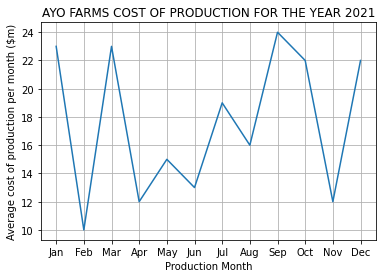

In [43]:
import matplotlib.pyplot as plt
x = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])
y = np.array(ran_cost)
plt.title("AYO FARMS COST OF PRODUCTION FOR THE YEAR 2021")
plt.xlabel("Production Month")
plt.ylabel("Average cost of production per month ($m)")
plt.plot(x, y)
plt.grid()
plt.show()

In [44]:
amount_saved = abs(avg_cost_per_month - 10)/abs(avg_cost_per_month) * 100
amount_saved
print (f'\n\nThis shows that using Hungarian method and the scipy module, AYO FARMS will spend an avegare of ${objective_function.round()} million monthly, as against ${avg_cost_per_month.round()} million.\n\nWhich means that with this method, the company will be able to save ${(avg_cost_per_month - objective_function).round()} million monthly and ${((avg_cost_per_month - objective_function)*12).round()} million yearly, therefore     reducing their cost of production by {amount_saved.round()}% over the year.')



This shows that using Hungarian method and the scipy module, AYO FARMS will spend an avegare of $10 million monthly, as against $18.0 million.

Which means that with this method, the company will be able to save $8.0 million monthly and $91.0 million yearly, therefore     reducing their cost of production by 43.0% over the year.


$$
 THANK-YOU 
$$